In [59]:
#Importing libraries
import numpy as np
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
#distributing data into test and train
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

#name of the output file
output_file = "submission.csv"

In [61]:
#test data for evaluation

test= pd.read_csv("test.csv")
mnist_testset = np.loadtxt('test.csv', skiprows=1, dtype='int', delimiter=',')
test = mnist_testset.astype("float32")
test = test.reshape(-1, 28, 28, 1)/255.

print(test.shape)
# test.head()

(28000, 28, 28, 1)


In [62]:
print ("training data shape:")
print (x_train.shape)
print (y_train.shape)
print ("\nTest data shape:")
print (x_test.shape)
print (y_test.shape)

training data shape:
(60000, 28, 28)
(60000,)

Test data shape:
(10000, 28, 28)
(10000,)


Text(0.5,1,'Y[1000] = 0')

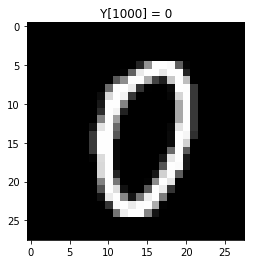

In [63]:
img_num = 1000
plt.imshow(X=x_train[img_num].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.title("Y[" + str(img_num) + "] = " + str(y_train[img_num]))

In [64]:
#we have 60000 training and 10000 validation images of 28x28 size.

idx = np.random.randint(x_train.shape[0], size=60000)
x_train = x_train[idx, :]
y_train = y_train[idx]

print (x_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [65]:
# let's specify input dimensions of each image
img_rows, img_cols = 28,28
input_shape = (img_rows, img_cols, 1)

#also we can mention the batch size, number of classes and epochs
batch_size = 128
num_classes = 10
epochs = 12

In [66]:
#reshaping the dataset for the model's input

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
# let's reshape y_train from (20000, ) to (20000, 10)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [68]:
#converting pixels from int to float

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalising
x_train /= 255
x_test /=225

In [69]:
#bulding a model
#model
model = Sequential()

# first layer needs to be told the input shape explicitly

#first CNN layer

model.add(Conv2D(32, kernel_size=(3,3),
                activation = 'relu',
                input_shape = input_shape))

#second CNN layer

model.add(Conv2D(64, kernel_size=(3,3),
                activation = 'relu'))

#third CNN layer
model.add(Conv2D(128, kernel_size=(3,3),
                activation = 'relu'))
#adding a maxpool layer
model.add(MaxPooling2D(pool_size=(2,2)))
#dropping out few neurons
model.add(Dropout(0.25))

#adding afully connected layer after flattining the input
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15488)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1982592   
__________

In [70]:
#fitting the data on model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
47104/60000 [======================>.......] - ETA: 1:31 - loss: 0.2688 - acc: 0.9170

In [ ]:
#evaluating the model on the validation data

model.evaluate(x_test, y_test)

In [ ]:
#prediciting and storing the data into the submission CSV with header.
y_hat = model.predict(test, batch_size=64)

In [ ]:
y_pred = np.argmax(y_hat,axis=1)

In [ ]:
y_pred

In [ ]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))